# Intro
## Acea Smart Water Analytics: Can you help preserve "blue gold" using data to predict water availability?
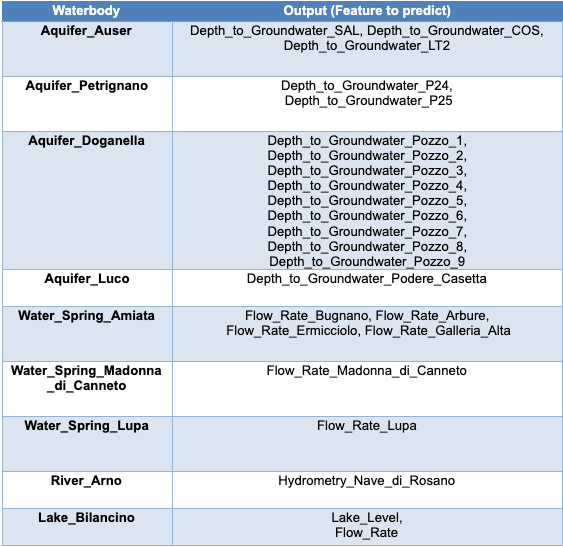


In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk  # machine learning
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output 
#   when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Quick look
#### We'll take a quick look at the data before cleaning

In [ ]:
# /kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
dog = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv", parse_dates=['Date'])

In [ ]:
dog.info()

In [ ]:
dog.columns=dog.columns.str.replace('+','')

In [ ]:
fig, axs = plt.subplots(4, figsize=(20, 20))
axs[0].set_title('Rainfall')
axs[0].plot(dog.Rainfall_Monteporzio)
axs[0].plot(dog.Rainfall_Velletri)
axs[1].set_title('Depth_to_Groundwater')
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_1)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_2)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_3)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_4)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_5)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_6)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_7)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_8)
axs[1].plot(dog.Depth_to_Groundwater_Pozzo_9)
axs[2].set_title('Volume')
axs[2].plot(dog.Volume_Pozzo_1)
axs[2].plot(dog.Volume_Pozzo_2)
axs[2].plot(dog.Volume_Pozzo_3)
axs[2].plot(dog.Volume_Pozzo_4)
axs[2].plot(dog.Volume_Pozzo_56)
axs[2].plot(dog.Volume_Pozzo_7)
axs[2].plot(dog.Volume_Pozzo_8)
axs[2].plot(dog.Volume_Pozzo_9)
axs[3].set_title('Temperature')
axs[3].plot(dog.Temperature_Monteporzio)
axs[3].plot(dog.Temperature_Velletri)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Aquifer_Auser.csv
aus = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Auser.csv", parse_dates=['Date'])

In [ ]:
aus.info()

In [ ]:
#aus.isnull().sum()

In [ ]:
fig, axs = plt.subplots(5, figsize=(20, 26))
axs[0].set_title('Rainfall')
axs[0].plot(aus.Rainfall_Gallicano)
axs[0].plot(aus.Rainfall_Pontetetto)
axs[0].plot(aus.Rainfall_Monte_Serra)
axs[0].plot(aus.Rainfall_Orentano)
axs[0].plot(aus.Rainfall_Borgo_a_Mozzano)
axs[0].plot(aus.Rainfall_Piaggione)
axs[0].plot(aus.Rainfall_Calavorno)
axs[0].plot(aus.Rainfall_Croce_Arcana)
axs[0].plot(aus.Rainfall_Tereglio_Coreglia_Antelminelli)
axs[0].plot(aus.Rainfall_Fabbriche_di_Vallico)
axs[1].set_title('Depth to Groundwater')
axs[1].plot(aus.Depth_to_Groundwater_LT2)
axs[1].plot(aus.Depth_to_Groundwater_SAL)
axs[1].plot(aus.Depth_to_Groundwater_PAG)
axs[1].plot(aus.Depth_to_Groundwater_CoS)
axs[1].plot(aus.Depth_to_Groundwater_DIEC)
axs[2].set_title('Temperature')
axs[2].plot(aus.Temperature_Orentano)
axs[2].plot(aus.Temperature_Monte_Serra)
axs[2].plot(aus.Temperature_Ponte_a_Moriano)
axs[2].plot(aus.Temperature_Lucca_Orto_Botanico)
axs[3].set_title('Volume')
axs[3].plot(aus.Volume_POL)
axs[3].plot(aus.Volume_CC1)
axs[3].plot(aus.Volume_CC2)
axs[3].plot(aus.Volume_CSA)
axs[3].plot(aus.Volume_CSAL)
axs[4].set_title('Hydrometry')
axs[4].plot(aus.Hydrometry_Monte_S_Quirico)
axs[4].plot(aus.Hydrometry_Piaggione)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
ami = pd.read_csv("/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv", parse_dates=['Date'])

In [ ]:
ami.info()

In [ ]:
fig, axs = plt.subplots(4, figsize=(20, 22))
axs[0].set_title('Rainfall')
axs[0].plot(ami.Rainfall_Castel_del_Piano)
axs[0].plot(ami.Rainfall_Abbadia_S_Salvatore)
axs[0].plot(ami.Rainfall_S_Fiora)
axs[0].plot(ami.Rainfall_Laghetto_Verde)
axs[0].plot(ami.Rainfall_Vetta_Amiata)
axs[1].set_title('Depth to Groundwater')
axs[1].plot(ami.Depth_to_Groundwater_S_Fiora_8)
axs[1].plot(ami.Depth_to_Groundwater_S_Fiora_11bis)
axs[1].plot(ami.Depth_to_Groundwater_David_Lazzaretti)
axs[2].set_title('Temperature')
axs[2].plot(ami.Temperature_Abbadia_S_Salvatore)
axs[2].plot(ami.Temperature_S_Fiora)
axs[2].plot(ami.Temperature_Laghetto_Verde)
axs[3].set_title('Flow Rate')
axs[3].plot(ami.Flow_Rate_Bugnano)
axs[3].plot(ami.Flow_Rate_Arbure)
axs[3].plot(ami.Flow_Rate_Ermicciolo)
axs[3].plot(ami.Flow_Rate_Galleria_Alta)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Lake_Bilancino.csv
bil = pd.read_csv("/kaggle/input/acea-water-prediction/Lake_Bilancino.csv", parse_dates=['Date'])

In [ ]:
bil.info()

In [ ]:
fig, axs = plt.subplots(4, figsize=(20, 22))
axs[0].set_title('Rainfall')
axs[0].plot(bil.Rainfall_S_Piero)
axs[0].plot(bil.Rainfall_Mangona)
axs[0].plot(bil.Rainfall_S_Agata)
axs[0].plot(bil.Rainfall_Cavallina)
axs[0].plot(bil.Rainfall_Le_Croci)
axs[1].set_title('Lake Level')
axs[1].plot(bil.Lake_Level)
axs[2].set_title('Temperature')
axs[2].plot(bil.Temperature_Le_Croci)
axs[3].set_title('Flow Rate')
axs[3].plot(bil.Flow_Rate)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
mad = pd.read_csv("/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv", parse_dates=['Date'])

In [ ]:
mad.info()

In [ ]:
fig, axs = plt.subplots(3, figsize=(20, 16))
axs[0].set_title('Rainfall')
axs[0].plot(mad.Rainfall_Settefrati )
axs[1].set_title('Temperature')
axs[1].plot(mad.Temperature_Settefrati )
axs[2].set_title('Flow Rate')
axs[2].plot(mad.Flow_Rate_Madonna_di_Canneto)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Aquifer_Luco.csv
luc = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Luco.csv", parse_dates=['Date'])

In [ ]:
luc.info()

In [ ]:
fig, axs = plt.subplots(4, figsize=(20, 22))
axs[0].set_title('Rainfall')
axs[0].plot(luc.Rainfall_Simignano)
axs[0].plot(luc.Rainfall_Siena_Poggio_al_Vento )
axs[0].plot(luc.Rainfall_Mensano)
axs[0].plot(luc.Rainfall_Montalcinello)
axs[0].plot(luc.Rainfall_Monticiano_la_Pineta)
axs[0].plot(luc.Rainfall_Sovicille)
axs[0].plot(luc.Rainfall_Ponte_Orgia)
axs[0].plot(luc.Rainfall_Scorgiano)
axs[0].plot(luc.Rainfall_Pentolina)
axs[0].plot(luc.Rainfall_Monteroni_Arbia_Biena)
axs[1].set_title('Depth to Groundwater')
axs[1].plot(luc.Depth_to_Groundwater_Podere_Casetta)
axs[1].plot(luc.Depth_to_Groundwater_Pozzo_1)
axs[1].plot(luc.Depth_to_Groundwater_Pozzo_3)
axs[1].plot(luc.Depth_to_Groundwater_Pozzo_4)
axs[2].set_title('Temperature')
axs[2].plot(luc.Temperature_Siena_Poggio_al_Vento)
axs[2].plot(luc.Temperature_Mensano)
axs[2].plot(luc.Temperature_Pentolina)
axs[2].plot(luc.Temperature_Monteroni_Arbia_Biena)
axs[3].set_title('Volume')
axs[3].plot(luc.Volume_Pozzo_1)
axs[3].plot(luc.Volume_Pozzo_3)
axs[3].plot(luc.Volume_Pozzo_4)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
pet = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv", parse_dates=['Date'])

In [ ]:
pet.info()

In [ ]:
fig, axs = plt.subplots(5, figsize=(20, 26))
axs[0].set_title('Rainfall')
axs[0].plot(pet.Rainfall_Bastia_Umbra)
axs[1].set_title('Depth to Groundwater')
axs[1].plot(pet.Depth_to_Groundwater_P24)
axs[1].plot(pet.Depth_to_Groundwater_P25)
axs[2].set_title('Temperature')
axs[2].plot(pet.Temperature_Bastia_Umbra)
axs[2].plot(pet.Temperature_Petrignano)
axs[3].set_title('Volume')
axs[3].plot(pet.Volume_C10_Petrignano)
axs[4].set_title('Hydrometry')
axs[4].plot(pet.Hydrometry_Fiume_Chiascio_Petrignano)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
lup = pd.read_csv("/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv", parse_dates=['Date'])

In [ ]:
lup.info()

In [ ]:
fig, axs = plt.subplots(2, figsize=(20, 8))
axs[0].set_title('Rainfall')
axs[0].plot(lup.Rainfall_Terni)
axs[1].set_title('Flow Rate')
axs[1].plot(lup.Flow_Rate_Lupa)
plt.show()

In [ ]:
# /kaggle/input/acea-water-prediction/River_Arno.csv
arn = pd.read_csv("/kaggle/input/acea-water-prediction/River_Arno.csv", parse_dates=['Date'])

In [ ]:
arn.info()

In [ ]:
fig, axs = plt.subplots(3, figsize=(20, 16))
axs[0].set_title('Rainfall')
axs[0].plot(arn.Rainfall_Le_Croci)
axs[0].plot(arn.Rainfall_Cavallina)
axs[0].plot(arn.Rainfall_S_Agata)
axs[0].plot(arn.Rainfall_Mangona)
axs[0].plot(arn.Rainfall_S_Piero)
axs[0].plot(arn.Rainfall_Vernio)
axs[0].plot(arn.Rainfall_Stia)
axs[0].plot(arn.Rainfall_Consuma)
axs[0].plot(arn.Rainfall_Incisa)
axs[0].plot(arn.Rainfall_Montevarchi)
axs[0].plot(arn.Rainfall_S_Savino)
axs[0].plot(arn.Rainfall_Laterina)
axs[0].plot(arn.Rainfall_Bibbiena)
axs[0].plot(arn.Rainfall_Camaldoli)
axs[1].set_title('Temperature')
axs[1].plot(arn.Temperature_Firenze)
axs[2].set_title('Hydrometry')
axs[2].plot(arn.Hydrometry_Nave_di_Rosano)
plt.show()

## Closer look
#### We'll start to drill down a bit

In [ ]:
##  dog  /kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
##  aus  /kaggle/input/acea-water-prediction/Aquifer_Auser.csv
##  ami  /kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
##  bil  /kaggle/input/acea-water-prediction/Lake_Bilancino.csv
##  mad  /kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
##  luc  /kaggle/input/acea-water-prediction/Aquifer_Luco.csv
##  pet  /kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
##  lup  /kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
##  arn  /kaggle/input/acea-water-prediction/River_Arno.csv

In [ ]:
dog.info()

In [ ]:
dog.isnull().sum()

In [ ]:
dog.head(2)

In [ ]:
dog.tail(2)

In [ ]:
sns.distplot(dog.Rainfall_Monteporzio)

In [ ]:
sns.distplot(dog.Rainfall_Velletri)

In [ ]:
sns.distplot(dog.Depth_to_Groundwater_Pozzo_1)

In [ ]:
sns.distplot(dog.Volume_Pozzo_1)

In [ ]:
dog = dog.set_index(['Date'])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
dog.last('3Y').Rainfall_Monteporzio.plot()
dog.last('3Y').Depth_to_Groundwater_Pozzo_1.plot()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
dog.loc['2019-01-01':'2020-01-01'].Rainfall_Monteporzio.plot()
dog.loc['2019-01-01':'2020-01-01'].Depth_to_Groundwater_Pozzo_1.plot()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
dog.loc['2019-01-01':'2019-06-01'].Rainfall_Monteporzio.plot()
dog.loc['2019-01-01':'2019-06-01'].Depth_to_Groundwater_Pozzo_1.plot()
plt.show()

In [ ]:
dog = dog.sort_values(by=['Date'])

In [ ]:
dog.loc['2019-01-29':'2019-03-03'].Depth_to_Groundwater_Pozzo_1.head(35)

In [ ]:
#from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import minmax_scaling

In [ ]:
dog.head(2)

In [ ]:
scaled_rain_Monteporizio = minmax_scaling(dog, columns='Rainfall_Monteporzio')

In [ ]:
scaled_depth_Pozzo1 = minmax_scaling(dog, columns='Depth_to_Groundwater_Pozzo_1')

In [ ]:
scaled_rain_Monteporizio.head()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
scaled_rain_Monteporizio.loc['2019-01-01':'2019-06-01'].plot()
scaled_depth_Pozzo1.loc['2019-01-01':'2019-06-01'].plot()
plt.show()

### More to follow...
#### Hope this gave you some ideas